<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/CNN_Depth_and_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Effect of network depth on learning/prediction accuracy

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [23]:
( train_images, train_labels ), ( test_images, test_labels ) = mnist.load_data()

print('Validation dataset:')
print(test_images.shape)
print(test_labels.shape)

Validation dataset:
(10000, 28, 28)
(10000,)


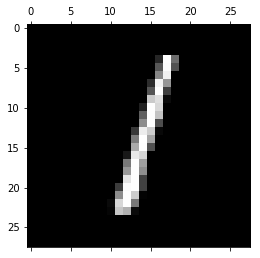

1


In [24]:
plt.matshow( test_images[2], cmap = 'gray')
plt.show()
print(test_labels[2])

#### Use the Test Set to do the training (because it is smaller)

In [25]:
train_images = test_images.reshape( ( 10000, 28, 28, 1 ) )

train_images = train_images.astype( 'float32' ) / 255

print("Before:")
print( test_labels.shape )
print( test_labels[0] )

train_labels = to_categorical( test_labels )

print("After:")
print( train_labels.shape )
print( train_labels[0] )

Before:
(10000,)
7
After:
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


----------

In [26]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 20, 20, 16)        6416      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 16)        6416      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 16)        6416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                9232      
__________

In [27]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 6s 800us/step - loss: 0.5744 - acc: 0.8186 - val_loss: 0.1630 - val_acc: 0.9560
Epoch 2/8
8000/8000 [==============================] - 5s 658us/step - loss: 0.1766 - acc: 0.9466 - val_loss: 0.1176 - val_acc: 0.9625
Epoch 3/8
8000/8000 [==============================] - 5s 648us/step - loss: 0.1146 - acc: 0.9636 - val_loss: 0.0642 - val_acc: 0.9800
Epoch 4/8
8000/8000 [==============================] - 5s 652us/step - loss: 0.0794 - acc: 0.9765 - val_loss: 0.0749 - val_acc: 0.9795
Epoch 5/8
8000/8000 [==============================] - 5s 649us/step - loss: 0.0786 - acc: 0.9746 - val_loss: 0.0699 - val_acc: 0.9775
Epoch 6/8
8000/8000 [==============================] - 5s 654us/step - loss: 0.0549 - acc: 0.9819 - val_loss: 0.0648 - val_acc: 0.9790
Epoch 7/8
8000/8000 [==============================] - 5s 650us/step - loss: 0.0529 - acc: 0.9829 - val_loss: 0.0735 - val_acc: 0.9805
Epoch 8

-----------

In [28]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))

for i in range(1000):
    model.add(Conv2D(filters = 4, kernel_size = 5, activation = 'relu', padding='same'))

model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 4)         1604      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 4)         404       
__________

In [31]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 8s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3008 - val_acc: 0.1150
Epoch 2/8
8000/8000 [==============================] - 8s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3008 - val_acc: 0.1150
Epoch 3/8
8000/8000 [==============================] - 8s 959us/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3008 - val_acc: 0.1150
Epoch 4/8
8000/8000 [==============================] - 8s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3007 - val_acc: 0.1150
Epoch 5/8
8000/8000 [==============================] - 8s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 6/8
8000/8000 [==============================] - 9s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 7/8
8000/8000 [==============================] - 8s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 8/8
8000/8000

-----------

In [32]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))

for i in range(16):
    model.add(Conv2D(filters = 4, kernel_size = 5, activation = 'relu', padding='same'))

model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 24, 24, 4)         1604      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 24, 24, 4)         404       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 24, 24, 4)         404       
__________

In [34]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 2/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 3/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3008 - val_acc: 0.1150
Epoch 4/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 5/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 6/8
8000/8000 [==============================] - 13s 2ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 7/8
8000/8000 [==============================] - 13s 2ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3007 - val_acc: 0.1150
Epoch 8/8
8000

---------
### BatchNormalization can help!

In [35]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))

for i in range(16):
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 4, kernel_size = 5, activation = 'relu', padding='same'))

model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 24, 24, 4)         1604      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 4)         16        
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 24, 24, 4)         404       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 4)         16        
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 4)         404       
__________

In [36]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 44s 6ms/step - loss: 1.3713 - acc: 0.5089 - val_loss: 0.6095 - val_acc: 0.8040
Epoch 2/8
8000/8000 [==============================] - 35s 4ms/step - loss: 0.4424 - acc: 0.8724 - val_loss: 0.3339 - val_acc: 0.8975
Epoch 3/8
8000/8000 [==============================] - 33s 4ms/step - loss: 0.3274 - acc: 0.9045 - val_loss: 0.3031 - val_acc: 0.9115
Epoch 4/8
8000/8000 [==============================] - 33s 4ms/step - loss: 0.2498 - acc: 0.9272 - val_loss: 0.1694 - val_acc: 0.9485
Epoch 5/8
8000/8000 [==============================] - 33s 4ms/step - loss: 0.1761 - acc: 0.9487 - val_loss: 0.1599 - val_acc: 0.9555
Epoch 6/8
8000/8000 [==============================] - 32s 4ms/step - loss: 0.1401 - acc: 0.9547 - val_loss: 0.1471 - val_acc: 0.9630
Epoch 7/8
8000/8000 [==============================] - 34s 4ms/step - loss: 0.1164 - acc: 0.9666 - val_loss: 0.1213 - val_acc: 0.9645
Epoch 8/8
8000

---------

In [37]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))

for i in range(64):
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 4, kernel_size = 5, activation = 'relu', padding='same'))

model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 24, 24, 16)        416       
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 24, 24, 4)         1604      
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 4)         16        
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 24, 24, 4)         404       
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 4)         16        
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 24, 24, 4)         404       
__________

In [38]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 142s 18ms/step - loss: 2.3042 - acc: 0.1030 - val_loss: 2.3013 - val_acc: 0.1150
Epoch 2/8
8000/8000 [==============================] - 116s 15ms/step - loss: 2.3019 - acc: 0.1141 - val_loss: 2.3020 - val_acc: 0.1150
Epoch 3/8
8000/8000 [==============================] - 118s 15ms/step - loss: 2.3017 - acc: 0.1126 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 4/8
8000/8000 [==============================] - 120s 15ms/step - loss: 2.3016 - acc: 0.1131 - val_loss: 2.3013 - val_acc: 0.1150
Epoch 5/8
8000/8000 [==============================] - 123s 15ms/step - loss: 2.3015 - acc: 0.1130 - val_loss: 2.3010 - val_acc: 0.1150
Epoch 6/8
8000/8000 [==============================] - 123s 15ms/step - loss: 2.3016 - acc: 0.1138 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 7/8
8000/8000 [==============================] - 125s 16ms/step - loss: 2.3015 - acc: 0.1129 - val_loss: 2.3008 - val_acc: 0.1150


#### Notice that even the training loss isn't improving